## Data Preprocess

In [1]:
import pandas as pd

names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
]
training_data = pd.read_csv('adult.data', names=names, skipinitialspace=True)
training_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Preprocessing

In [2]:
# Drop any rows with missing values
training_data = training_data.dropna()
# training_data["workclass"].value_counts()

# Normalizing the data 
most_common_workclass = training_data["workclass"].mode()[0]
most_common_occupation = training_data["occupation"].mode()[0]
most_common_country = training_data["native-country"].mode()[0]

training_data['workclass'].replace('?', most_common_workclass, inplace=True)
training_data['occupation'].replace('?', most_common_occupation, inplace=True)
training_data['native-country'].replace('?', most_common_country, inplace=True)

## Clustering Model

In [3]:
# Select numerical features for clustering
numerical_features = ['age', 'education-num', 'capital-gain', 'fnlwgt', 'hours-per-week']
X = training_data[numerical_features]


In [4]:
from sklearn.preprocessing import StandardScaler

# Standardize the feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
from sklearn.cluster import DBSCAN

# Choose the number of clusters (you may need to tune this)
num_clusters = 3

# Apply KMeans clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

DBSCAN()

## Pattern Extraction

In [6]:
# Analyze unique cluster labels
unique_clusters = set(dbscan.labels_)

# Examine cluster characteristics (e.g., means of features within each cluster)
for cluster_label in unique_clusters:
    if cluster_label != -1:  # Exclude noise points
        cluster_data = X[dbscan.labels_ == cluster_label]
        cluster_mean = cluster_data.mean()
        cluster_size = len(cluster_data)
        print(f"Cluster {cluster_label}: Size - {cluster_size}, Mean - {cluster_mean}")


Cluster 0: Size - 30313, Mean - age                   37.784548
education-num         10.089697
capital-gain         340.656979
fnlwgt            185289.975720
hours-per-week        40.052486
dtype: float64
Cluster 1: Size - 8, Mean - age                  89.750
education-num         9.375
capital-gain          0.000
fnlwgt            71451.000
hours-per-week       38.750
dtype: float64
Cluster 2: Size - 7, Mean - age                  61.142857
education-num         4.142857
capital-gain          0.000000
fnlwgt            34449.714286
hours-per-week       50.428571
dtype: float64
Cluster 3: Size - 7, Mean - age                   54.285714
education-num          9.000000
capital-gain       99999.000000
fnlwgt            167930.142857
hours-per-week        40.000000
dtype: float64
Cluster 4: Size - 10, Mean - age                   44.0
education-num         12.9
capital-gain        8073.0
fnlwgt            346973.0
hours-per-week        43.4
dtype: float64
Cluster 5: Size - 8, Mean - ag

In [7]:
# Identify noise points
noise_points = X[dbscan.labels_ == -1]

# Analyze characteristics of noise points (if needed)
print("Noise Points:", len(noise_points))


Noise Points: 2064


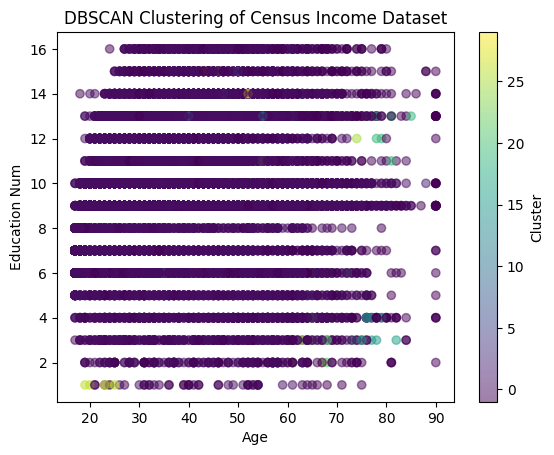

In [8]:
import matplotlib.pyplot as plt

# Visualize clusters in the first two dimensions (example with age and education-num)
plt.scatter(X['age'], X['education-num'], c=dbscan.labels_, cmap='viridis', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Education Num')
plt.title('DBSCAN Clustering of Census Income Dataset')
plt.colorbar(label='Cluster')
plt.show()

## Model Performance Evaluation

In [9]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assuming 'dbscan' is your trained DBSCAN model

# 1. Silhouette Score
silhouette_avg = silhouette_score(X_scaled, dbscan.labels_)
print("Silhouette Score:", silhouette_avg)

# 2. Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_scaled, dbscan.labels_)
print("Calinski-Harabasz Index:", ch_score)

# 3. Davies-Bouldin Index
db_score = davies_bouldin_score(X_scaled, dbscan.labels_)
print("Davies-Bouldin Index:", db_score)


Silhouette Score: -0.16967143108628868
Calinski-Harabasz Index: 81.02283149190723
Davies-Bouldin Index: 1.5745865502001724
